In [2324]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.metrics import r2_score

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)

# Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [2325]:
day = pd.read_csv("day.csv")
# Check the head of the dataset
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [2326]:
day.shape

(730, 16)

In [2327]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [2328]:
# Check the column null values
# print(len(day.columns))
day.isnull().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Drop unused columns

In [2329]:
drop_columns = ['instant', 'dteday', 'atemp', 'casual', 'registered']
day.drop(drop_columns, axis=1, inplace=True)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [2330]:
# print(day.yr.value_counts())
day.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,97.250000,34.000021,8714.000000


### Map and Convert column data type
- Change into category name
    - Map season => 1:spring, 2:summer, 3:fall, 4:winter
    - Map mnth => month ( 1 to 12)
    - Map weekday => day of the week
    - Map weathersit => 1: Clear, 2: Mist + Cloudy, 3: Light Snow
    

In [2331]:
# Defining the map function

# change_dtype = ['season', 'mnth', 'weekday', 'weathersit']
# day['season'] = day[change_dtype].astype('category')

map_season = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
map_mnth = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
map_weekday = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
map_weathersit = {1: 'Clear', 2: 'Mist + Cloudy', 3: 'Light Snow'}


day['season'] = day['season'].map(map_season)
day['mnth'] = day['mnth'].map(map_mnth)
day['weekday'] = day['weekday'].map(map_weekday)
day['weathersit'] = day['weathersit'].map(map_weathersit)


In [2332]:
# day.weathersit.value_counts()
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,January,0,Saturday,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600


# Step 2: Data Visualisation

- Identify if some predictors directly have a strong association with the outcome variable
- Visualise our data using `matplotlib` and `seaborn`.

#### Visualising Numeric Variables
 - Make a pairplot of all the numeric variables

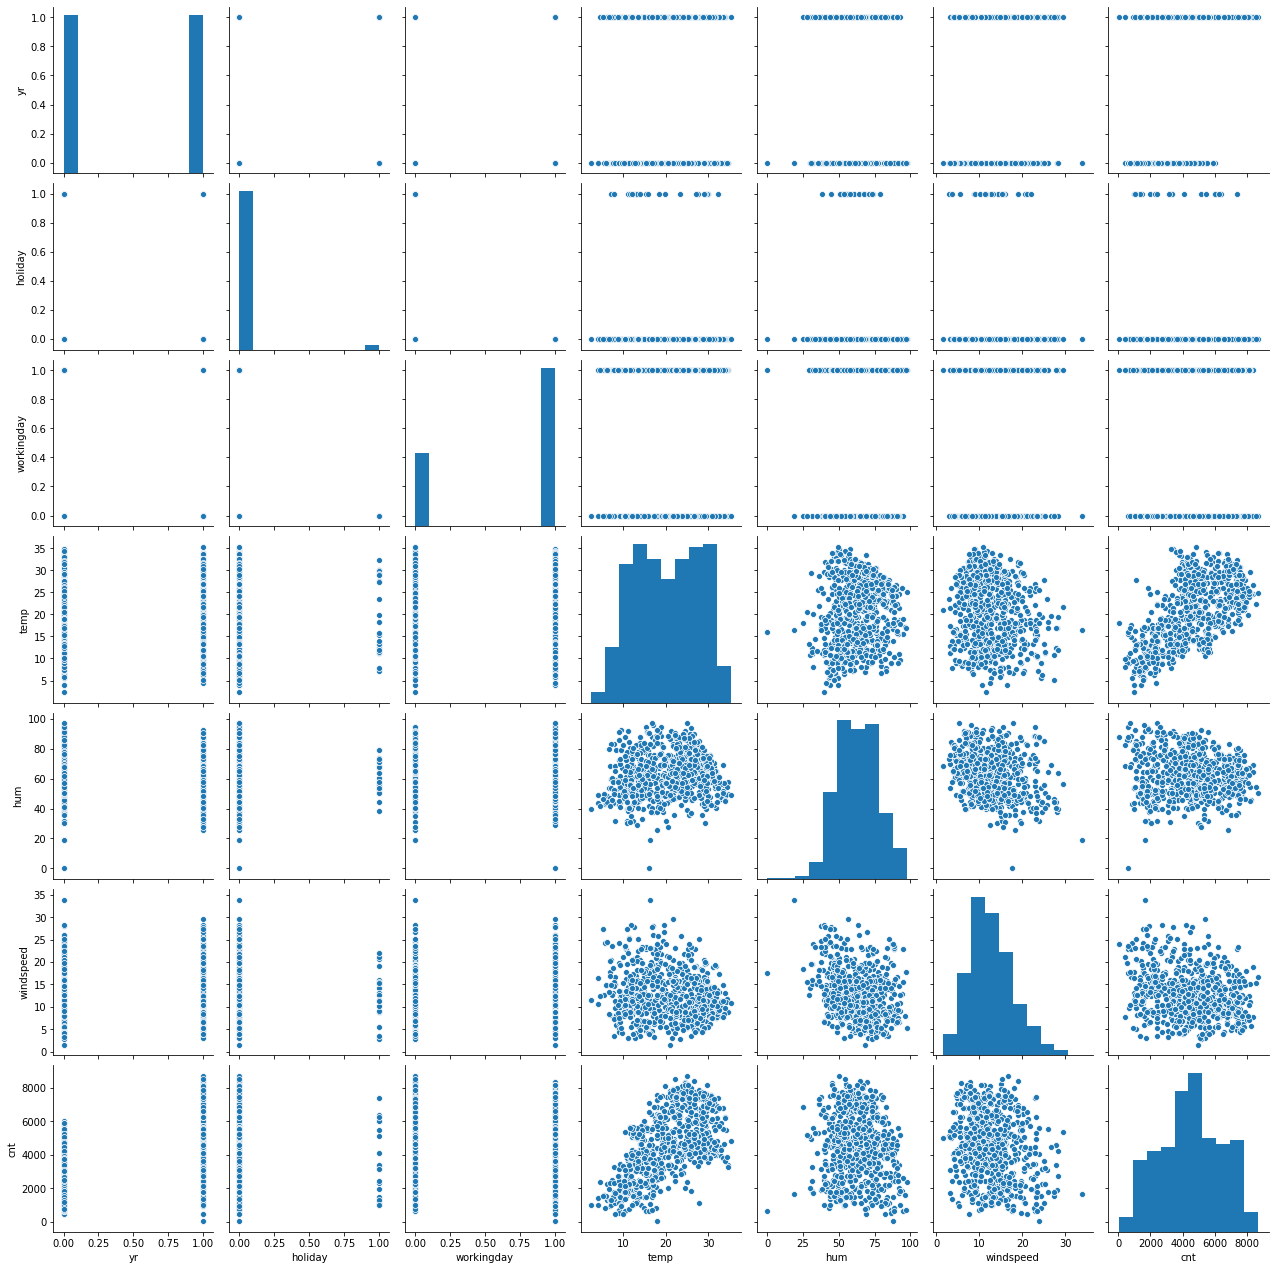

In [2333]:
sns.pairplot(day)
plt.show()

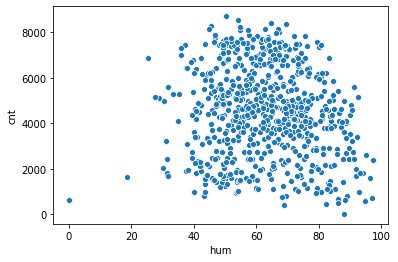

In [2334]:
# EDA for humidity with scatterplot
sns.scatterplot(x="hum", y="cnt", data=day)
plt.show()

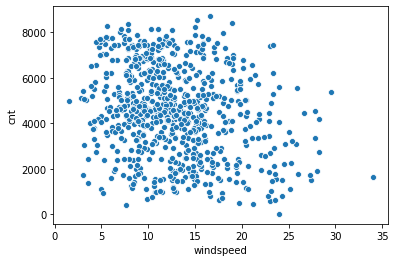

In [2335]:
# EDA for windspeed with scatterplot
sns.scatterplot(x="windspeed", y="cnt", data=day)
plt.show()

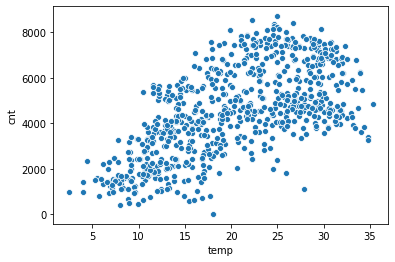

In [2336]:
# EDA for temp with scatterplot, GOOD CO-relation
sns.scatterplot(x="temp", y="cnt", data=day)
plt.show()

#### Visualising Categorical Variables


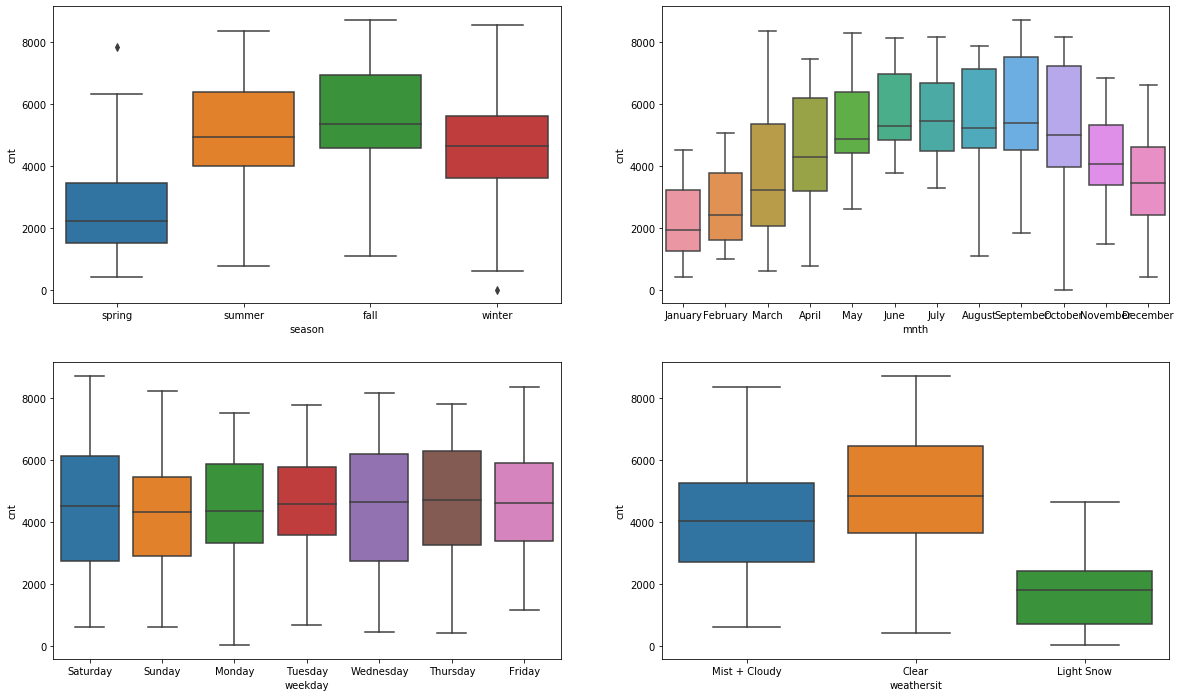

In [2337]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = day)
plt.subplot(2,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = day)
plt.subplot(2,2,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = day)
plt.subplot(2,2,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)
plt.show()

# Step 3: Data Preparation 


### Dummy Variables
- The variable `season`, `mnth`, `weekday`, `weathersit` has multiple levels. So need to convert these levels into integer using `dummy variables`.

In [2338]:
# Get the dummy variables for the categorical veriables

season = pd.get_dummies(day['season'], drop_first = True)
mnth = pd.get_dummies(day['mnth'], drop_first = True)
weekday = pd.get_dummies(day['weekday'], drop_first = True)
weathersit = pd.get_dummies(day['weathersit'], drop_first = True)

In [2339]:
season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [2340]:
# Add the all  variables to the dataframe
day = pd.concat([day, season, mnth, weekday, weathersit], axis = 1)

### Drop unused categorical veriables

In [2341]:
day.drop(['season', 'mnth', 'weekday', 'weathersit'], axis = 1, inplace=True)

In [2342]:
day.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist + Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Divide the Data into Training and Testing Sets

 - To performing a train-test split.

In [2343]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)

In [2344]:
df_train_rfe, df_test_rfe = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)

### Perform scaling

In [2345]:
scaler = MinMaxScaler()

In [2346]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [2347]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist + Cloudy
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [2348]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


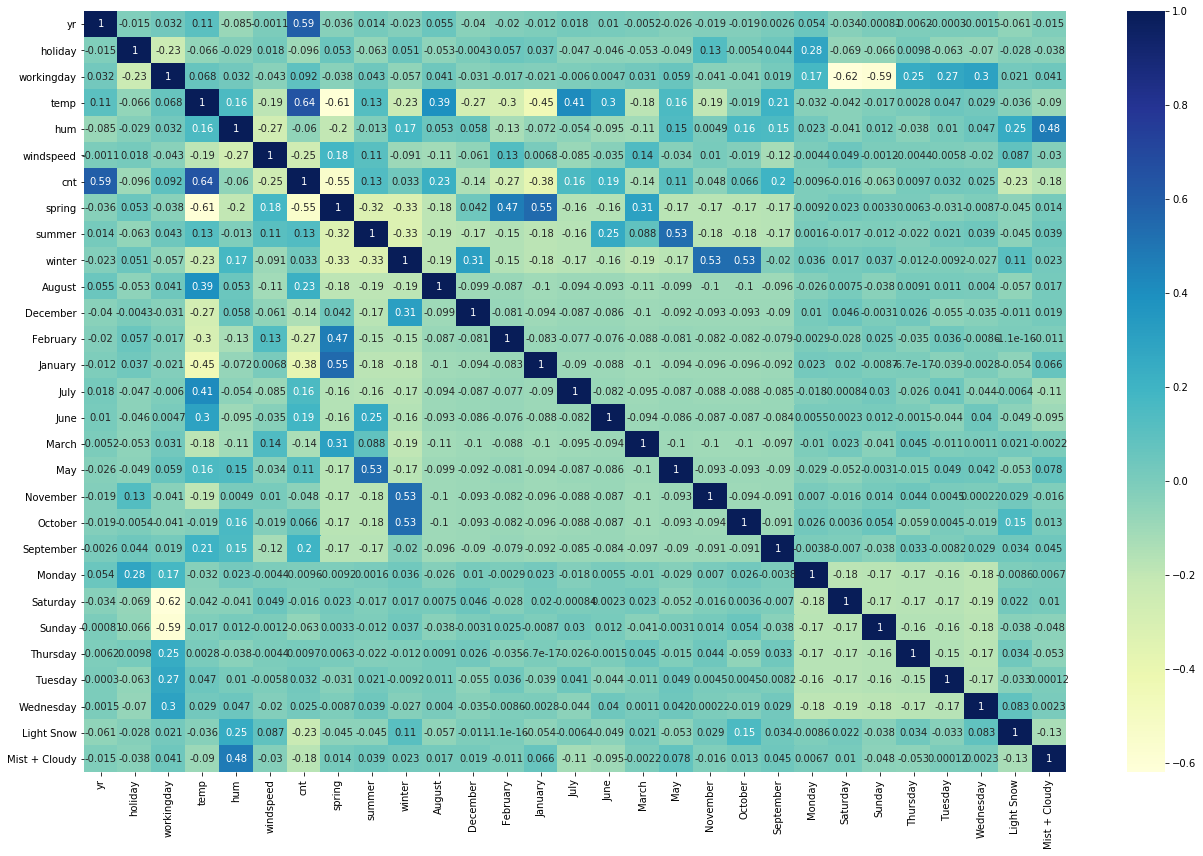

In [2349]:
# Check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (22, 14))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### As we can see `temp` are highly co-related with `cnt`
See a pairplot for `temp` vs `cnt`.

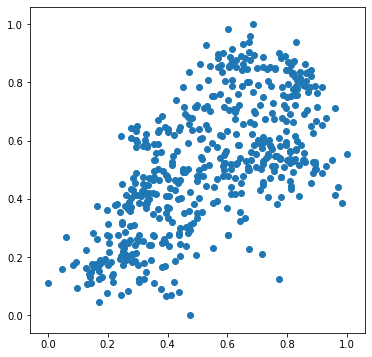

In [2350]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

### Divide data into X and y

In [2351]:
y_train = df_train.pop('cnt')
X_train = df_train

# Step 4: Data Modelling and Evaluation

### Running using LM `temp` 

In [2352]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# X_train_lm = sm.add_constant(X_train[['temp', 'yr', 'workingday', 'hum', 'windspeed', 'winter', 'September', 'Saturday', 'Sunday', 'Light Snow', 'Mist + Cloudy']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [2353]:
lr.params

const    0.169798
temp     0.639952
dtype: float64

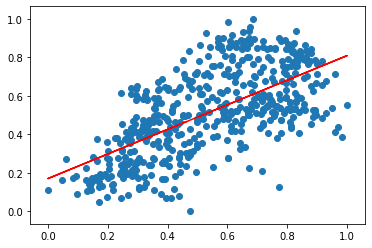

In [2354]:
# Visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.170 + 0.639*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [2355]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           5.80e-61
Time:                        11:32:48   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

Using `Temp`, The R-squared value obtained is `0.414`.

### Adding all the variables to the model

### Running LM 1

In [2356]:
# Check all the columns of the dataframe
day.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Light Snow', 'Mist + Cloudy'],
      dtype='object')

In [2357]:
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [2358]:
lr_1.params

const            0.245085
yr               0.232116
holiday          0.009959
workingday       0.096884
temp             0.450562
hum             -0.151340
windspeed       -0.186453
spring          -0.048159
summer           0.038725
winter           0.105847
August           0.014404
December        -0.045586
February        -0.032282
January         -0.062777
July            -0.040350
June            -0.002972
March            0.001045
May              0.023940
November        -0.041851
October          0.007534
September        0.081060
Monday          -0.020907
Saturday         0.096389
Sunday           0.041853
Thursday        -0.009237
Tuesday         -0.018890
Wednesday       -0.005388
Light Snow      -0.257443
Mist + Cloudy   -0.061066
dtype: float64

In [2359]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          8.74e-182
Time:                        11:32:48   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2451      0.035      6.955

### Checking VIF

In [2360]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,85.58
21,Saturday,19.72
22,Sunday,18.35
6,spring,10.79
8,winter,9.50
7,summer,8.29
3,temp,7.12
17,November,6.80
18,October,6.59
9,August,6.43


### Dropping the variable which are higher p-value and VIF and updating the model
- First we target high p-value columns to remove from the model

### Running Model 2: LM => Remove `March` high p-value

In [2361]:
# Dropping highly correlated variables and insignificant variables (higher p-value)
X = X_train.drop('March', 1,)
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [2362]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          8.33e-183
Time:                        11:32:48   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     483   BIC:                            -887.6
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2456      0.033      7.447

In [2363]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,74.88
20,Saturday,17.22
21,Sunday,16.19
6,spring,9.69
8,winter,9.18
7,summer,7.98
3,temp,6.93
9,August,5.71
13,July,5.14
16,November,4.87


### Running Model 3: LM => Remove `June` high p-value

In [2364]:
# Dropping highly correlated variables and insignificant variables (higher p-value)
X = X.drop('June', 1)
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [2365]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     112.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          7.84e-184
Time:                        11:32:49   Log-Likelihood:                 527.94
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     484   BIC:                            -893.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2452      0.033      7.471

In [2366]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,74.28
19,Saturday,17.04
20,Sunday,16.03
8,winter,8.86
6,spring,8.72
7,summer,7.44
3,temp,4.96
15,November,4.76
16,October,4.51
1,holiday,4.11


### Running Model 4: LM => Remove `October` high p-value

In [2367]:
# Dropping highly correlated variables and insignificant variables (higher p-value)
X = X.drop('October', 1,)
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [2368]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     117.5
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          7.40e-185
Time:                        11:32:49   Log-Likelihood:                 527.91
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     485   BIC:                            -900.0
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2468      0.032      7.666

In [2369]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,72.05
18,Saturday,16.53
19,Sunday,15.53
6,spring,8.55
7,summer,6.58
8,winter,6.29
3,temp,4.93
1,holiday,3.96
9,August,3.17
13,July,2.81


### Running Model 5: LM => Remove `Wednesday` hight p-value

In [2370]:
# Dropping highly correlated variables and insignificant variables (higher p-value)
X = X.drop('Wednesday', 1,)
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [2371]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          7.06e-186
Time:                        11:32:49   Log-Likelihood:                 527.83
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     486   BIC:                            -906.0
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2462      0.032      7.665

In [2372]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,70.12
18,Saturday,16.51
19,Sunday,15.50
6,spring,8.55
7,summer,6.57
8,winter,6.29
3,temp,4.92
1,holiday,3.91
9,August,3.17
13,July,2.81


### Running Model 6: LM => Remove `workingday` hight VIF

In [2373]:
# Dropping highly correlated variables and insignificant variables (higher p-value)
X = X.drop('workingday', 1,)
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [2374]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          7.06e-186
Time:                        11:32:49   Log-Likelihood:                 527.83
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     486   BIC:                            -906.0
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3416      0.040      8.604

In [2375]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,33.99
2,temp,21.35
5,spring,7.23
7,winter,5.93
6,summer,5.73
4,windspeed,4.95
8,August,3.12
12,July,2.79
11,January,2.41
22,Mist + Cloudy,2.36


### Running Model 7: LM => Remove `Saturday` hight p-value

In [2376]:
# Dropping highly correlated variables and insignificant variables (higher p-value)
X = X.drop('Saturday', 1,)
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

In [2377]:
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     128.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          6.27e-187
Time:                        11:32:49   Log-Likelihood:                 527.81
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     487   BIC:                            -912.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3424      0.039      8.688

In [2378]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,33.96
2,temp,21.29
5,spring,7.13
7,winter,5.85
6,summer,5.65
4,windspeed,4.91
8,August,3.10
12,July,2.77
11,January,2.41
21,Mist + Cloudy,2.36


### Running Model 8: LM => Remove `Thursday` hight p-value

In [2379]:
# Dropping highly correlated variables and insignificant variables (higher p-value)
X = X.drop('Thursday', 1,)
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()

In [2380]:
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     135.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          6.27e-188
Time:                        11:32:49   Log-Likelihood:                 527.64
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     488   BIC:                            -918.1
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3404      0.039      8.678

In [2381]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,33.91
2,temp,21.18
5,spring,7.11
7,winter,5.85
6,summer,5.64
4,windspeed,4.91
8,August,3.10
12,July,2.77
11,January,2.40
20,Mist + Cloudy,2.35


### Running Model 9: LM => Remove `August` hight p-value

In [2382]:
# Dropping highly correlated variables and insignificant variables (higher p-value)
X = X.drop('August', 1,)
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_lm).fit()

In [2383]:
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     141.9
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          6.40e-189
Time:                        11:32:49   Log-Likelihood:                 527.42
No. Observations:                 510   AIC:                            -1013.
Df Residuals:                     489   BIC:                            -923.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3490      0.037      9.462

In [2384]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,32.23
2,temp,18.42
5,spring,5.45
4,windspeed,4.84
7,winter,4.08
6,summer,3.34
10,January,2.38
19,Mist + Cloudy,2.35
0,yr,2.11
9,February,1.93


### Running Model 10: LM => Remove `Tuesday` hight p-value

In [2385]:
# Dropping highly correlated variables and insignificant variables (higher p-value)
X = X.drop('Tuesday', 1,)
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_lm).fit()

In [2386]:
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     149.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.13e-189
Time:                        11:32:49   Log-Likelihood:                 526.60
No. Observations:                 510   AIC:                            -1013.
Df Residuals:                     490   BIC:                            -928.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3473      0.037      9.416

In [2387]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,32.09
2,temp,18.41
5,spring,5.45
4,windspeed,4.83
7,winter,4.07
6,summer,3.34
10,January,2.38
18,Mist + Cloudy,2.35
0,yr,2.11
9,February,1.92


### Running Model 11: LM => Remove `Monday` hight p-value

In [2388]:
# Dropping highly correlated variables and insignificant variables (higher p-value)
X = X.drop('Monday', 1,)
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_lm).fit()

In [2389]:
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     157.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.96e-190
Time:                        11:32:50   Log-Likelihood:                 525.77
No. Observations:                 510   AIC:                            -1014.
Df Residuals:                     491   BIC:                            -933.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3452      0.037      9.364

In [2390]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.86
2,temp,18.40
5,spring,5.45
4,windspeed,4.83
7,winter,4.07
6,summer,3.34
10,January,2.38
17,Mist + Cloudy,2.34
0,yr,2.10
9,February,1.92


### Running Model 12: LM => Remove `May` hight p-value

In [2391]:
# Dropping highly correlated variables and insignificant variables (higher p-value)
X = X.drop('May', 1,)
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_12 = sm.OLS(y_train, X_train_lm).fit()

In [2392]:
print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.9
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          4.04e-191
Time:                        11:32:51   Log-Likelihood:                 524.74
No. Observations:                 510   AIC:                            -1013.
Df Residuals:                     492   BIC:                            -937.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3343      0.036      9.264

In [2393]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.84
2,temp,18.35
5,spring,5.45
4,windspeed,4.74
7,winter,4.07
6,summer,2.81
10,January,2.38
16,Mist + Cloudy,2.34
0,yr,2.09
9,February,1.92


### Running Model 13: LM => Remove `February` hight p-value

In [2394]:
# Dropping highly correlated variables and insignificant variables (higher p-value)
X = X.drop('February', 1,)
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_13 = sm.OLS(y_train, X_train_lm).fit()

In [2395]:
print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     175.5
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.11e-191
Time:                        11:32:52   Log-Likelihood:                 523.38
No. Observations:                 510   AIC:                            -1013.
Df Residuals:                     493   BIC:                            -940.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3231      0.035      9.107

In [2396]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.22
2,temp,17.81
4,windspeed,4.72
5,spring,4.37
7,winter,4.07
6,summer,2.81
15,Mist + Cloudy,2.34
0,yr,2.09
11,November,1.83
9,January,1.75


### Running Model 14: LM => Remove `November` hight p-value

In [2397]:
# Dropping highly correlated variables and insignificant variables (higher p-value)
    
X = X.drop('November', 1,)
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_14 = sm.OLS(y_train, X_train_lm).fit()

In [2398]:
print(lr_14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     185.2
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.08e-191
Time:                        11:32:52   Log-Likelihood:                 520.67
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     494   BIC:                            -941.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3055      0.035      8.782

In [2399]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.65
2,temp,17.39
4,windspeed,4.66
5,spring,4.35
7,winter,3.45
6,summer,2.79
14,Mist + Cloudy,2.32
0,yr,2.09
9,January,1.73
10,July,1.60


### Running Model 15: LM => Remove `December` hight p-value

In [2400]:
# Dropping highly correlated variables and insignificant variables (higher p-value)
X = X.drop('December', 1,)
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_15 = sm.OLS(y_train, X_train_lm).fit()



In [2401]:
print(lr_15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.45e-192
Time:                        11:32:53   Log-Likelihood:                 519.45
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     495   BIC:                            -945.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2972      0.034      8.635

In [2402]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.28
2,temp,16.71
4,windspeed,4.66
5,spring,4.34
7,winter,3.38
6,summer,2.78
13,Mist + Cloudy,2.30
0,yr,2.09
8,January,1.67
9,July,1.59


### Running Model 16: LM => Remove `January` hight p-value

In [2403]:
# Dropping highly correlated variables and insignificant variables (higher p-value)
X = X.drop('January', 1,)
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_16 = sm.OLS(y_train, X_train_lm).fit()

In [2404]:
print(lr_16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     211.4
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.13e-192
Time:                        11:32:54   Log-Likelihood:                 517.45
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     496   BIC:                            -947.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2852      0.034      8.395

In [2405]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.28
2,temp,16.03
4,windspeed,4.65
5,spring,4.01
7,winter,3.35
6,summer,2.78
12,Mist + Cloudy,2.30
0,yr,2.08
8,July,1.59
9,September,1.39


### Running Model 17: LM => Remove `hum` hight p-value

In [2406]:
# Dropping highly correlated variables and insignificant variables (higher p-value)
X = X.drop('hum', 1,)
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_17 = sm.OLS(y_train, X_train_lm).fit()


In [2407]:
print(lr_17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          6.45e-190
Time:                        11:32:55   Log-Likelihood:                 508.10
No. Observations:                 510   AIC:                            -990.2
Df Residuals:                     497   BIC:                            -935.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2063      0.029      7.088

In [2408]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.14
3,windspeed,4.60
5,summer,2.22
4,spring,2.11
0,yr,2.07
6,winter,1.82
7,July,1.59
11,Mist + Cloudy,1.55
8,September,1.34
9,Sunday,1.18


### Running Model 18: LM => Remove `July` hight p-value

In [2409]:
# (higher p-value)
X = X.drop('July', 1,)
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_18 = sm.OLS(y_train, X_train_lm).fit()


In [2410]:
print(lr_18.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     236.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.51e-189
Time:                        11:32:58   Log-Likelihood:                 504.38
No. Observations:                 510   AIC:                            -984.8
Df Residuals:                     498   BIC:                            -933.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1983      0.029      6.806

In [2411]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.59
2,temp,3.91
0,yr,2.07
4,spring,2.02
5,summer,1.90
6,winter,1.66
10,Mist + Cloudy,1.55
7,September,1.23
8,Sunday,1.18
9,Light Snow,1.08


### Running Model 19: LM => Remove `spring` hight p-value

In [2412]:
# (higher VIF)
X = X.drop('spring', 1,)
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_19 = sm.OLS(y_train, X_train_lm).fit()


In [2413]:
print(lr_19.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     256.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.88e-189
Time:                        11:33:00   Log-Likelihood:                 500.84
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     499   BIC:                            -933.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1350      0.017      8.129

In [2414]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.72
3,windspeed,3.08
0,yr,2.00
4,summer,1.56
9,Mist + Cloudy,1.48
5,winter,1.39
6,September,1.21
7,Sunday,1.16
8,Light Snow,1.08
1,holiday,1.04


### Residual Analysis of the train data

In [2415]:
y_train_predict = lr_19.predict(X_train_lm)

Text(0.5, 0, 'Errors')

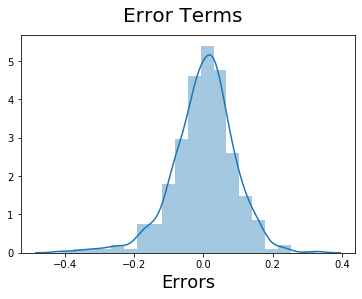

In [2416]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_predict), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions and Evaluation on the Test Set Using the Final Model

In [2417]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])


In [2418]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist + Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [2419]:
y_test = df_test.pop('cnt')
X_test = df_test

In [2420]:
# Adding constant variable to test dataframe
X_test_m19 = sm.add_constant(X_test)
X_test_m19.shape

(219, 29)

In [2421]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m19
X_test_m19 = X_test_m19.drop(['spring', 'July', 'hum', 'January', 'December', 'November', 'February', 'May', 'Monday', 'Tuesday', 'August', 'Thursday', 'Saturday', 'workingday', 'Wednesday', 'October', 'June', 'March'], axis = 1)
print(X_test_m19.shape)
X_train_lm.shape


(219, 11)


(510, 11)

In [2422]:
# Making predictions using the Model 19
y_pred_m19 = lr_19.predict(X_test_m19)

Text(0, 0.5, 'y_pred')

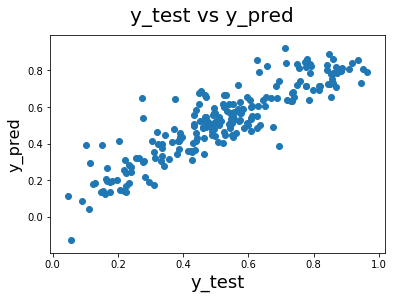

In [2423]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m19)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

### Evaluate the Model

In [2424]:
r2_score(y_true=y_test, y_pred=y_pred_m19)

0.7958272128950747

# Conclusion
### Final equation of our best fitted line is:

cnt = 0.1350 * yr + -0.1072 * holiday + 0.5471 * temp + -0.1531 * windspeed + 0.0866 * summer + 0.1323 * winter + 0.0992 * September + -0.0500 * Sunday + -0.2892 * Light Snow + -0.0819 * (Mist + Cloudy)

# Model Evaluation using Mixed RFE approach

In [2425]:
# import RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2463]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)


In [2464]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('August', False, 7),
 ('December', False, 3),
 ('February', False, 4),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('March', False, 14),
 ('May', False, 5),
 ('November', False, 2),
 ('October', False, 10),
 ('September', True, 1),
 ('Monday', False, 8),
 ('Saturday', True, 1),
 ('Sunday', False, 6),
 ('Thursday', False, 11),
 ('Tuesday', False, 9),
 ('Wednesday', False, 12),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1)]

In [2465]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'January', 'July', 'September', 'Saturday',
       'Light Snow', 'Mist + Cloudy'],
      dtype='object')

In [2466]:
X_train.columns[~rfe.support_]

Index(['August', 'December', 'February', 'June', 'March', 'May', 'November',
       'October', 'Monday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [2430]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Running Model 1: LM

In [2431]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [2432]:
lm_1 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [2433]:
# Summary of our linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.31e-191
Time:                        11:33:51   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2510      0.036      6.949

### Running Model 2: LM => Remove `January` hight p-value

In [2434]:
X_train_new = X_train_rfe.drop(["January"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm_2 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [2435]:
# Summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.13e-191
Time:                        11:34:08   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2394      0.036      6.696

In [2436]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,82.34
7,spring,5.02
4,temp,3.62
9,winter,3.49
8,summer,2.61
5,hum,1.91
3,workingday,1.88
12,Saturday,1.78
14,Mist + Cloudy,1.57
10,July,1.49


### Running Model 3: LM => Remove `holiday` hight p-value

In [2437]:
X_train_new = X_train_new.drop(["holiday"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm_3 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [2438]:
# Summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.4
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          8.51e-192
Time:                        11:35:27   Log-Likelihood:                 515.37
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     496   BIC:                            -943.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2298      0.036      6.451

In [2439]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,81.13
6,spring,5.02
3,temp,3.62
8,winter,3.49
7,summer,2.61
4,hum,1.91
2,workingday,1.65
11,Saturday,1.64
13,Mist + Cloudy,1.57
9,July,1.49


### Running Model 4: LM => Remove `spring` hight p-value 

In [2440]:
X_train_new = X_train_new.drop(["spring"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm_4 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [2441]:
# Summary of our linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     223.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.26e-191
Time:                        11:35:52   Log-Likelihood:                 511.55
No. Observations:                 510   AIC:                            -997.1
Df Residuals:                     497   BIC:                            -942.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1705      0.028      5.991

In [2442]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.12
4,hum,1.89
2,workingday,1.65
10,Saturday,1.64
3,temp,1.60
12,Mist + Cloudy,1.56
8,July,1.43
6,summer,1.33
7,winter,1.29
11,Light Snow,1.24


### Running Model 5: LM => Remove `July` hight p-value

In [2443]:
X_train_new = X_train_new.drop(["July"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm_5 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [2444]:
# Summary of our linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.89e-191
Time:                        11:36:20   Log-Likelihood:                 508.45
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     498   BIC:                            -942.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1698      0.029      5.937

In [2445]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.12
4,hum,1.87
2,workingday,1.65
9,Saturday,1.64
11,Mist + Cloudy,1.56
3,temp,1.27
7,winter,1.25
10,Light Snow,1.24
6,summer,1.19
5,windspeed,1.18


### Running Model 6: LM => Remove `hum` hight VIF

In [2446]:
X_train_new = X_train_new.drop(["hum"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm_6 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [2447]:
# Summary of our linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.47e-188
Time:                        11:38:43   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0753      0.019      4.051

In [2449]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [2450]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,yr,2.02
7,Saturday,1.69
4,summer,1.57
9,Mist + Cloudy,1.53
5,winter,1.40
6,September,1.20
8,Light Snow,1.08


# RFE Conclusion
### Final equation of our best fitted line is:

cnt = 0.2331 * yr + 0.0563 * workingday + 0.5499 * temp + -0.1552 * windspeed + 0.0874 * summer + 0.1318 * winter + 0.0972 * September + 0.0677 * Saturday + -0.2880 * Light Snow + -0.0813 * (Mist + Cloudy)

## Residual Analysis of the train data

In [2451]:
y_train_pred = lm_6.predict(X_train_lm)

Text(0.5, 0, 'Errors')

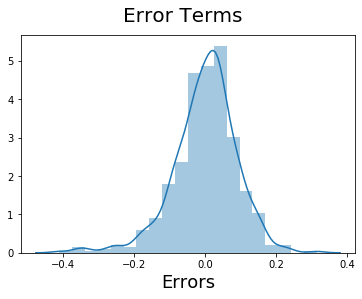

In [2452]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

## Making Predictions

#### Applying the scaling on the test sets

In [2453]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_test_rfe[num_vars] = scaler.transform(df_test_rfe[num_vars])

#### Dividing into X_test and y_test

In [2454]:
y_test_rfe = df_test_rfe.pop('cnt')
X_test_rfe = df_test_rfe

In [2455]:
# X_train_new = X_train_new.drop(['const'], axis=1)

In [2456]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test_rfe[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [2457]:
# Model to make predictions.
y_pred_rf = lm_6.predict(X_test_new)

## Model Evaluation

In [2458]:
r2_score(y_true=y_test_rfe, y_pred=y_pred_rf)

0.7955844377237248

Text(0, 0.5, 'y_pred')

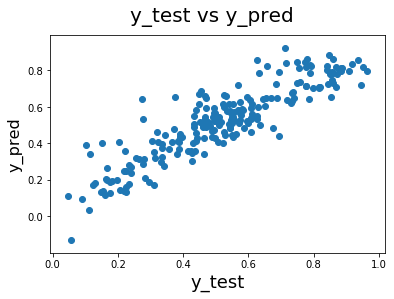

In [2459]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test_rfe,y_pred_rf)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 